In [1]:
%load_ext watermark
from IPython.display import clear_output 
clear_output()
%watermark -a "Romell D.Z.(@romellfudi) Software Engineer, Business Intelligence Analist and Data Scientist" -iv  -u -d

Author: Romell D.Z.(@romellfudi) Software Engineer, Business Intelligence Analist and Data Scientist

Last updated: 2023-09-15



# Filters with KERAS Preprocessing

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD

2023-09-15 11:42:41.127981: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-15 11:42:41.159772: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-15 11:42:41.160442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 11:42:41.971309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


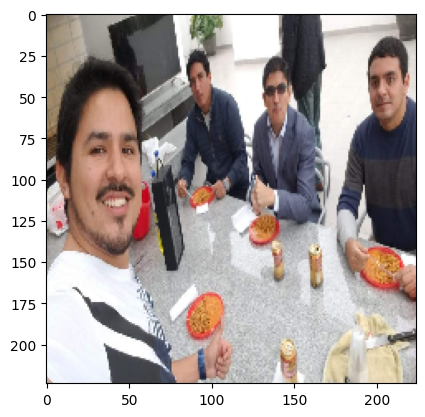

In [4]:
path_photo_a = 'snapshot/teamA.jpg'
photo_a = image.load_img(path_photo_a,target_size=(224,224))
plt.imshow(photo_a)

In [7]:
vgg16_model = VGG16(weights='imagenet', include_top=True)
sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
vgg16_model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [8]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
photo_a = image.img_to_array(photo_a)
photo_a = np.expand_dims(photo_a, axis=0)
photo_a = preprocess_input(photo_a)

In [12]:
model = Model(vgg16_model.input, 
              vgg16_model.get_layer('block1_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

pool_features1 = model.predict(photo_a)
pool_features1.shape

1/1 [==============================] - 2s 2s/step


(1, 112, 112, 64)

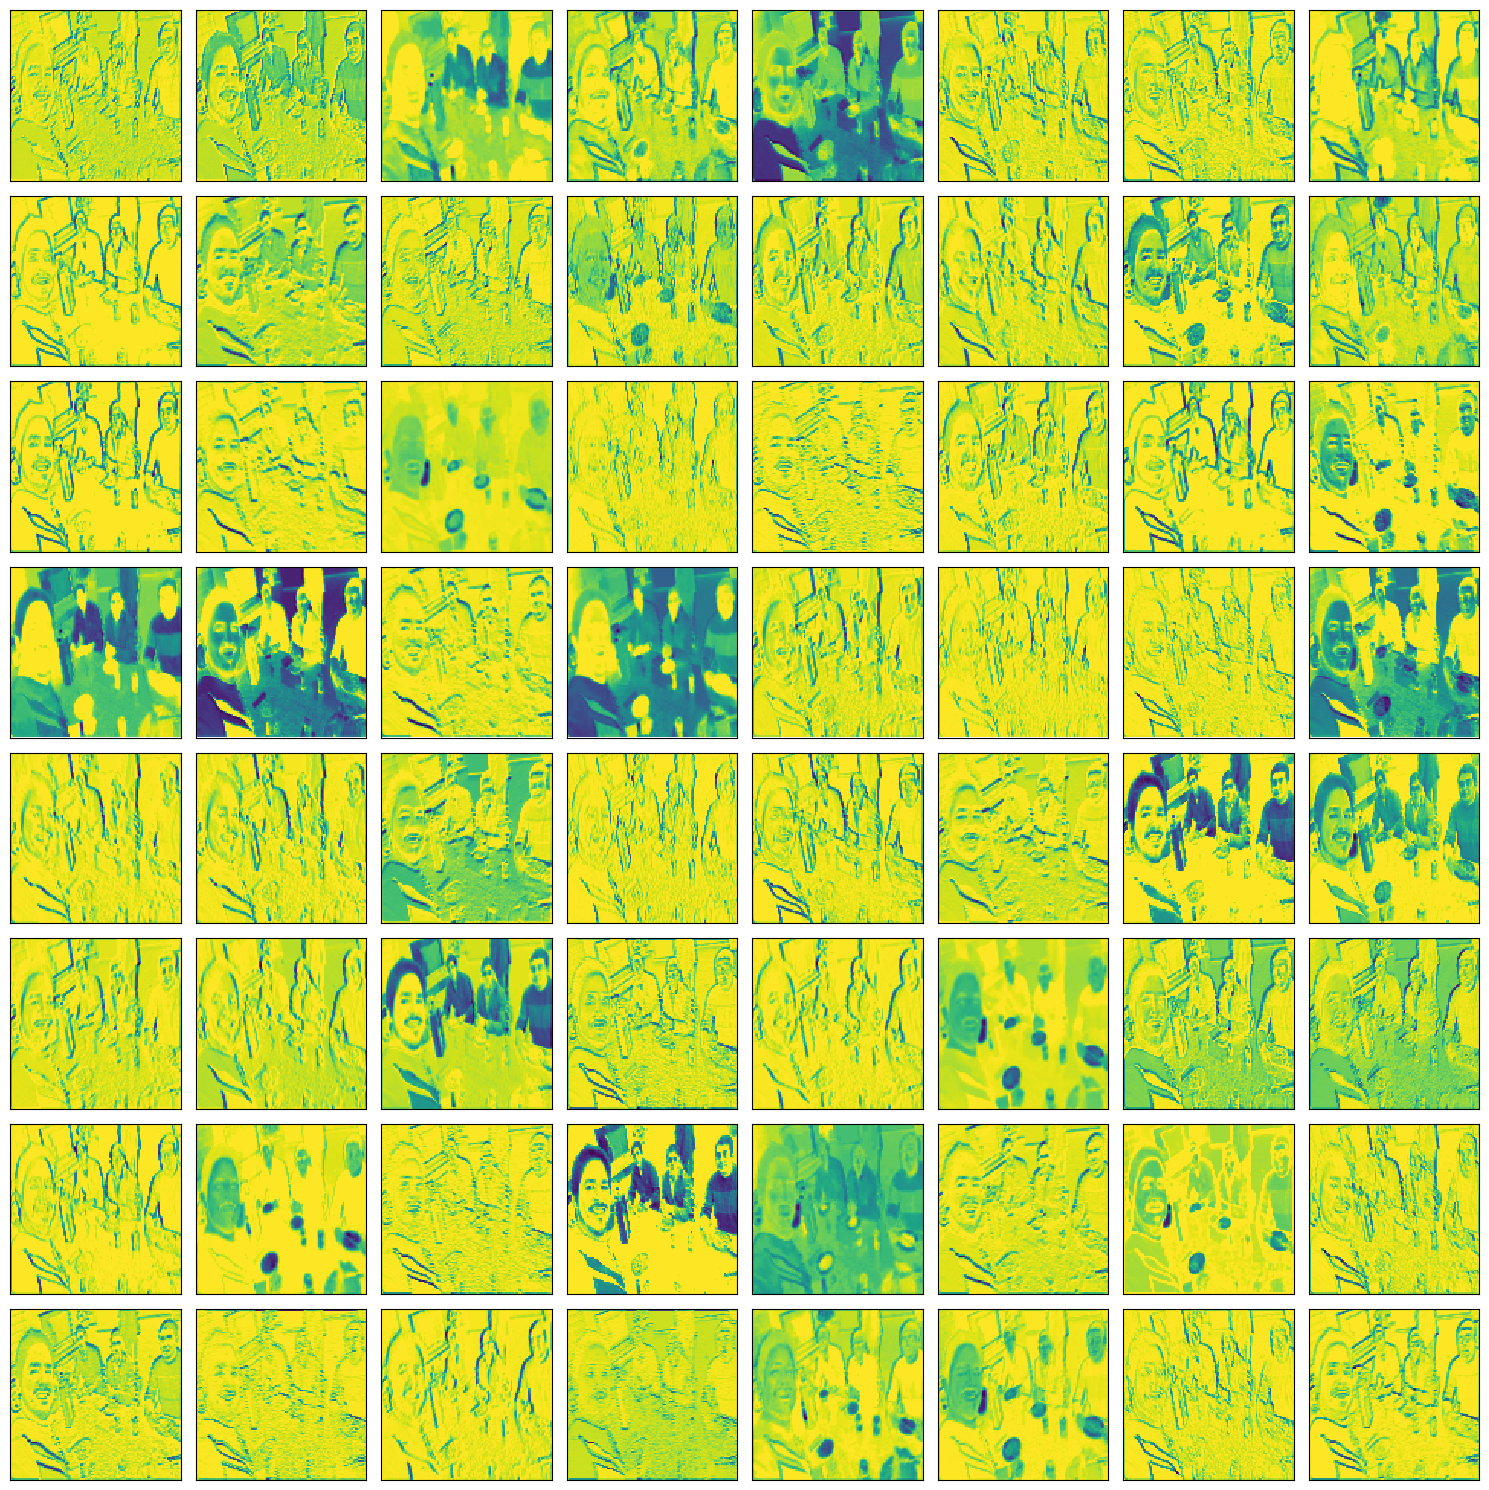

In [13]:
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
axes = np.ravel(axes)
for i in range(pool_features1.shape[3]):
    axes[i].imshow(255-pool_features1[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [15]:
model2 = Model(vgg16_model.input, 
              vgg16_model.get_layer('block2_pool').output)
model2.compile(optimizer=sgd, loss='categorical_crossentropy')

pool_features_2 = model.predict(photo_a)
pool_features_2.shape

1/1 [==============================] - 0s 64ms/step


(1, 112, 112, 64)

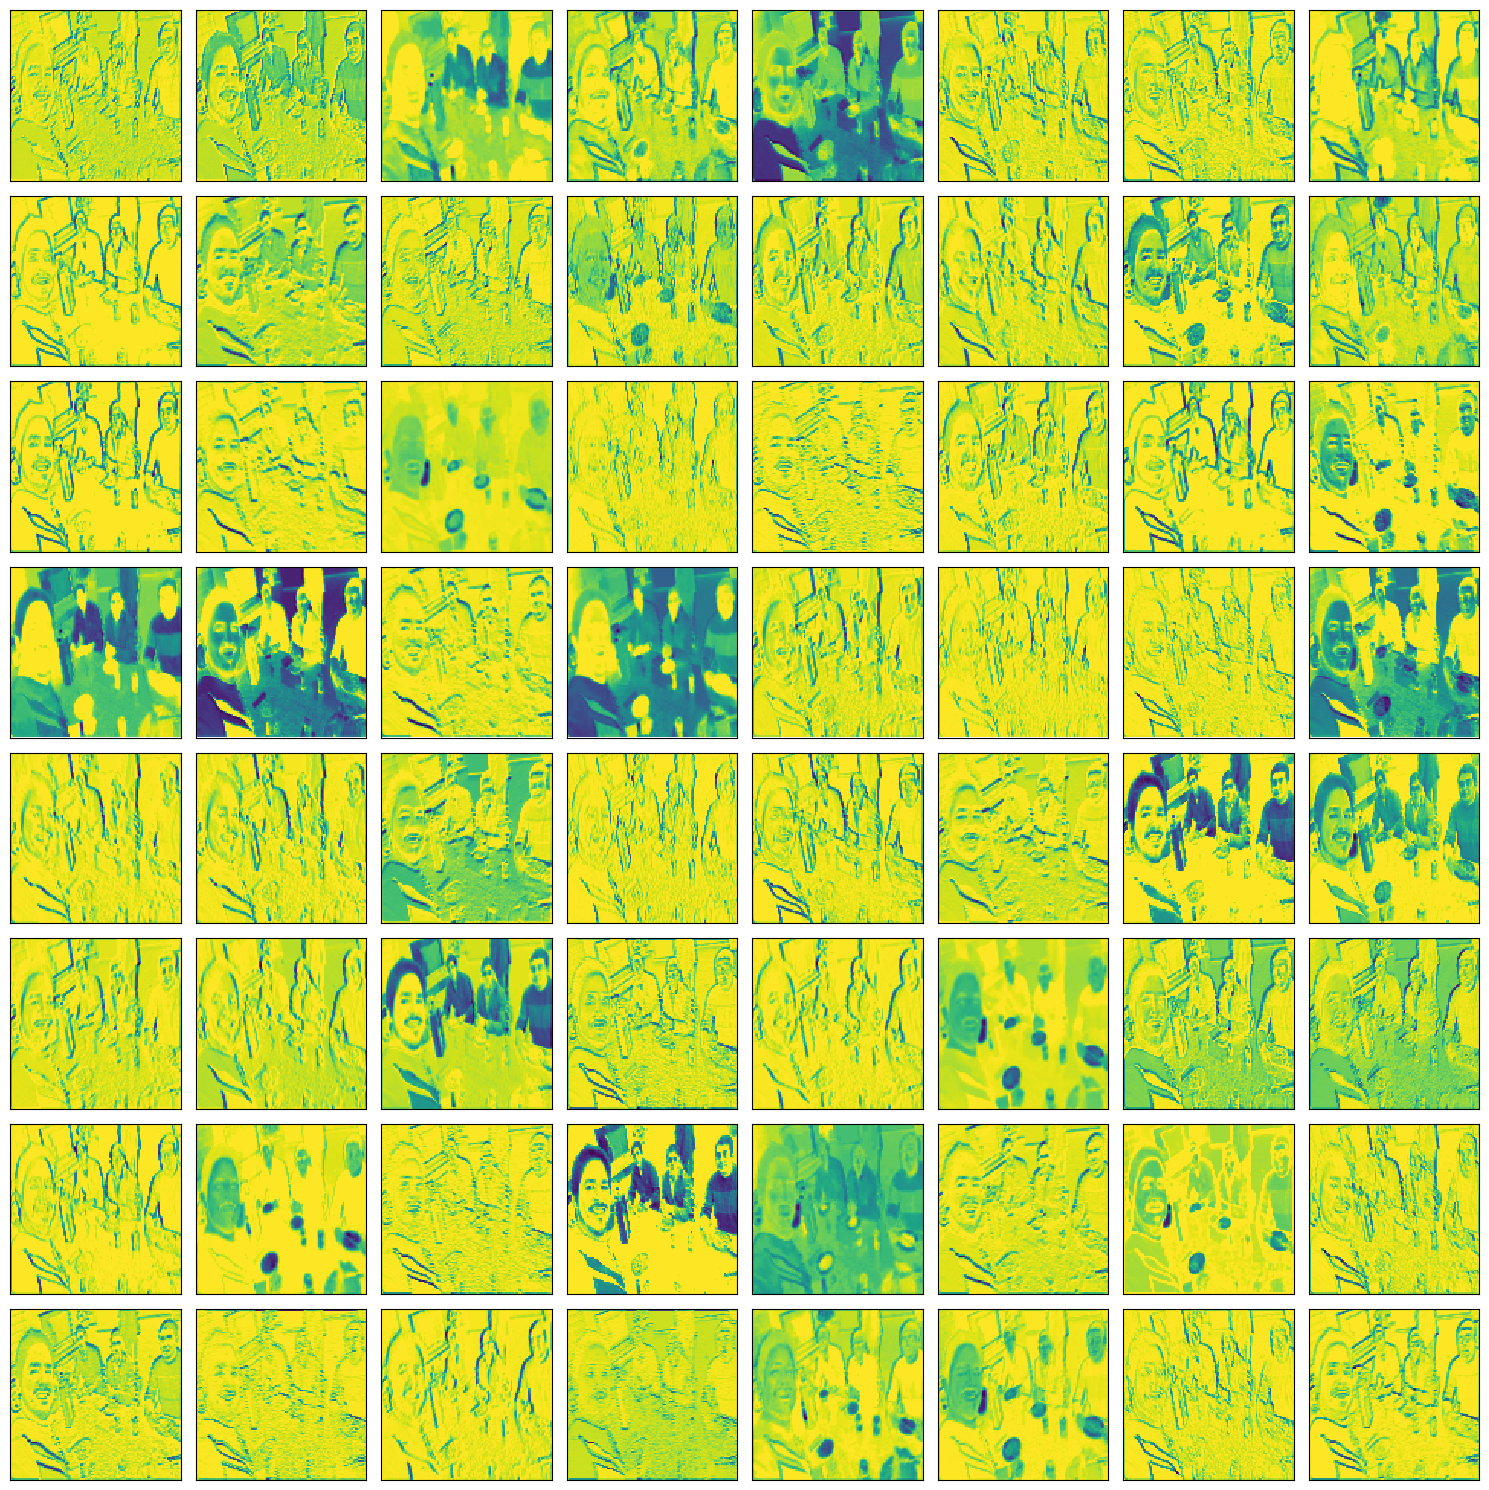

In [16]:
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
axes = np.ravel(axes)
for i in range(pool_features_2.shape[3]):
    axes[i].imshow(255-pool_features_2[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [17]:
model2 = Model(vgg16_model.input, 
              vgg16_model.get_layer('block3_pool').output)
model2.compile(optimizer=sgd, loss='categorical_crossentropy')

pool_features_2 = model.predict(photo_a)
pool_features_2.shape

1/1 [==============================] - 0s 149ms/step


(1, 112, 112, 64)

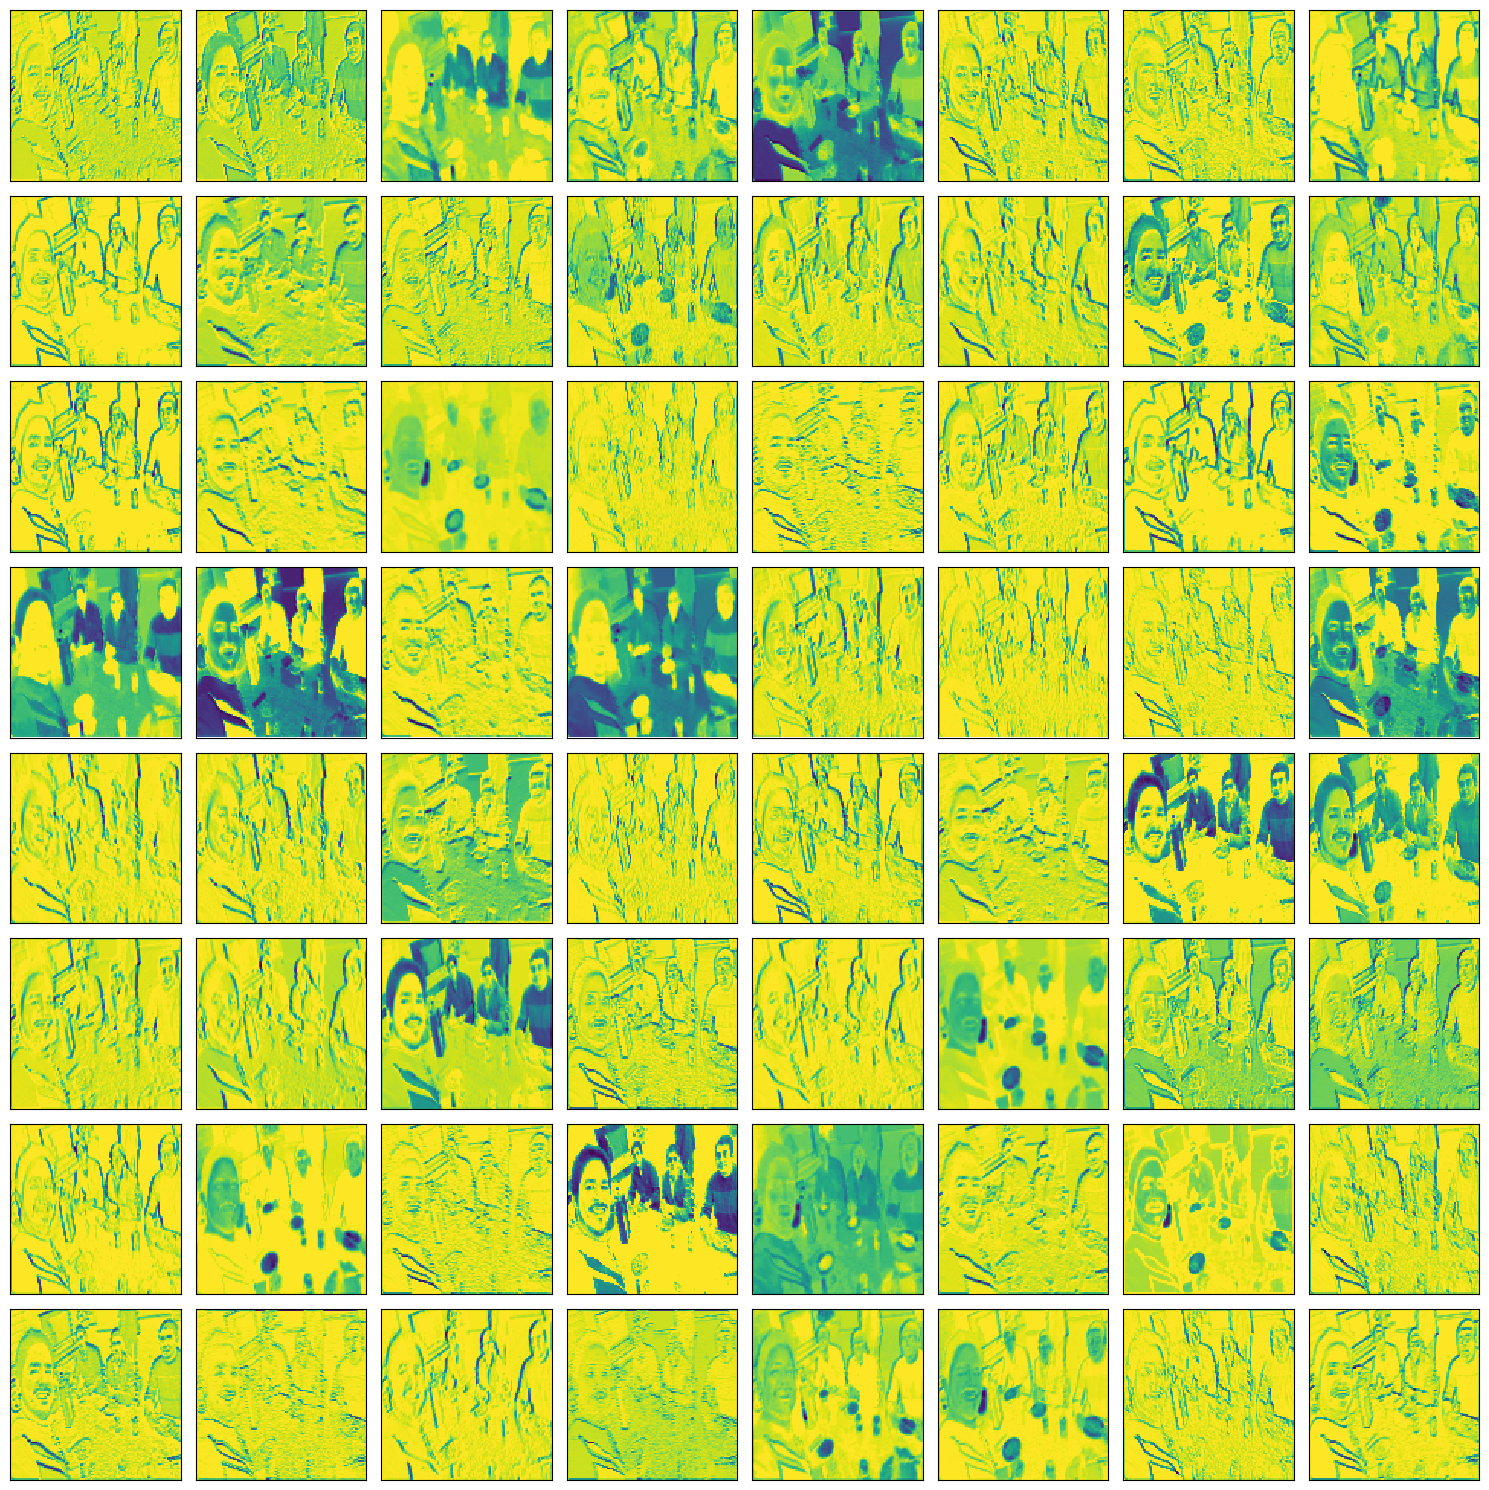

In [18]:
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
axes = np.ravel(axes)
for i in range(pool_features_2.shape[3]):
    axes[i].imshow(255-pool_features_2[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()